# Trabajo Práctico 1 : Propiedades en Venta

### 1. Análisis Exploratorio y Preprocesamiento de Datos

El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

In [1]:
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Obtengo el data frame desde el archivo csv
properati_df = pd.read_csv("Datasets/properati_argentina_2021.csv")

In [2]:
properati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [3]:
properati_df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-39,-68,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6,NaN,NaN,206,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-35,-56,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4,3,193,193,390000,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32,-58,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110,45,47000,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-35,-55,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3,NaN,180,400000,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-39,-68,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3,2,NaN,98,102000,USD,PH - Villa Farrell


##### Chequeo que no haya tipos de propiedades mal parseados/con errores

In [5]:
properati_df['property_type'].unique()

array(['Casa', 'PH', 'Departamento', 'Lote', 'Depósito', 'Otro',
       'Local comercial', 'Oficina', 'Casa de campo', 'Cochera'],
      dtype=object)

##### Chequeo que no haya ciudades ('place_l2') mal parseados

In [6]:
properati_df['place_l2'].unique()

array(['Neuquén', 'Montevideo', 'Entre Ríos', 'Maldonado',
       'Bs.As. G.B.A. Zona Norte', 'Córdoba', 'Mendoza',
       'Capital Federal', 'Canelones', 'Misiones', 'Santa Fe', 'Tucumán',
       'Bs.As. G.B.A. Zona Oeste', 'Salta', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Interior', 'San Juan', 'Michigan',
       'Buenos Aires Costa Atlántica', 'Chubut', 'Río Negro',
       'Corrientes', 'La Pampa', 'Colonia', 'San Luis', 'Jujuy',
       'Florida', 'Tierra Del Fuego', 'Santiago Del Estero',
       'Santa Catarina', 'Chaco', 'Rocha', 'Rio Grande do Norte',
       'Formosa', 'Catamarca', 'Santa Cruz', 'Rio de Janeiro',
       'São Paulo', 'Maryland', 'Miami', 'La Rioja', 'Pennsylvania',
       'California'], dtype=object)

##### Chequeo que no haya tipos de operación mal parseados

In [7]:
properati_df['operation'].unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

##### Chequeo que no haya tipos de moneda mal parseados

In [8]:
properati_df['property_currency'].unique()

array([nan, 'USD', 'UYU', 'ARS', 'PEN', 'COP'], dtype=object)

Se omitirá el analisis de los valores nulos de 'property_currency'

In [9]:
# Filtro para seleccionar las propiedades que son del tipo Casa, PH o Departamento
propery_type_filter = properati_df.property_type.isin(['Casa', 'PH', 'Departamento'])

# Filtro para seleccionar las propiedades localizadas en Capital federal
place_is_caba = properati_df.place_l2 == 'Capital Federal'

# Filtro para seleccionar las propiedades que tienen por operacion la Venta
operation_is_venta = properati_df.operation == 'Venta'

# Filtro para seleccionar las propiedades en dolares
currency_is_usd = properati_df.property_currency == 'USD'

# Aplico los filtros sobre el dataset original
properati_df = properati_df.loc[currency_is_usd & operation_is_venta & place_is_caba & propery_type_filter]

In [10]:
# Renombro la variable place_l3 a barrio
properati_df= properati_df.rename(columns={"place_l3": "barrio"})

In [11]:
# Filtro las columnas que tienen todos sus valores null: "place_l5" y "place_l6", las que son unicas: "operation", "place_l2" y property_currency y las no categoricas property_title
properati_df = properati_df.loc[:, ['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud', 'barrio', 'place_l4','property_type', 'property_rooms', 'property_bedrooms','property_surface_total', 'property_surface_covered', 'property_price']]

In [12]:
properati_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94249 entries, 25 to 460090
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   barrio                    93832 non-null  object 
 7   place_l4                  3643 non-null   object 
 8   property_type             94249 non-null  object 
 9   property_rooms            93205 non-null  float64
 10  property_bedrooms         83262 non-null  float64
 11  property_surface_total    89405 non-null  float64
 12  property_surface_covered  90895 non-null  float64
 13  property_price            94249 non-null  float64
dtypes: f

In [13]:
properati_df.head()

,id,start_date,end_date,created_on,latitud,longitud,barrio,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,NaN,NaN,Casa,4,3,171,133,210000
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-35,-58,Boca,NaN,Departamento,3,2,58,55,82900
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-35,-58,Boca,NaN,Departamento,4,3,70,70,99000
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-35,-58,Once,NaN,Departamento,4,2,NaN,104,146000
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-35,-58,Boedo,NaN,PH,4,2,NaN,73,250000


### Separacion entre set de entrenamiento y de test

In [14]:
# Filtro las filas que tienen barrio null para poder separar los sets manteniendo la proporcion por barrio
properati_df = properati_df.loc[properati_df.barrio.notna()]

In [15]:
properati_df = properati_df.reset_index()

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(properati_df, properati_df["barrio"]):
    properati_train_set = properati_df.loc[train_index]
    properati_test_set = properati_df.loc[test_index]    

### Analisis Exploratorio y preprocesamiento

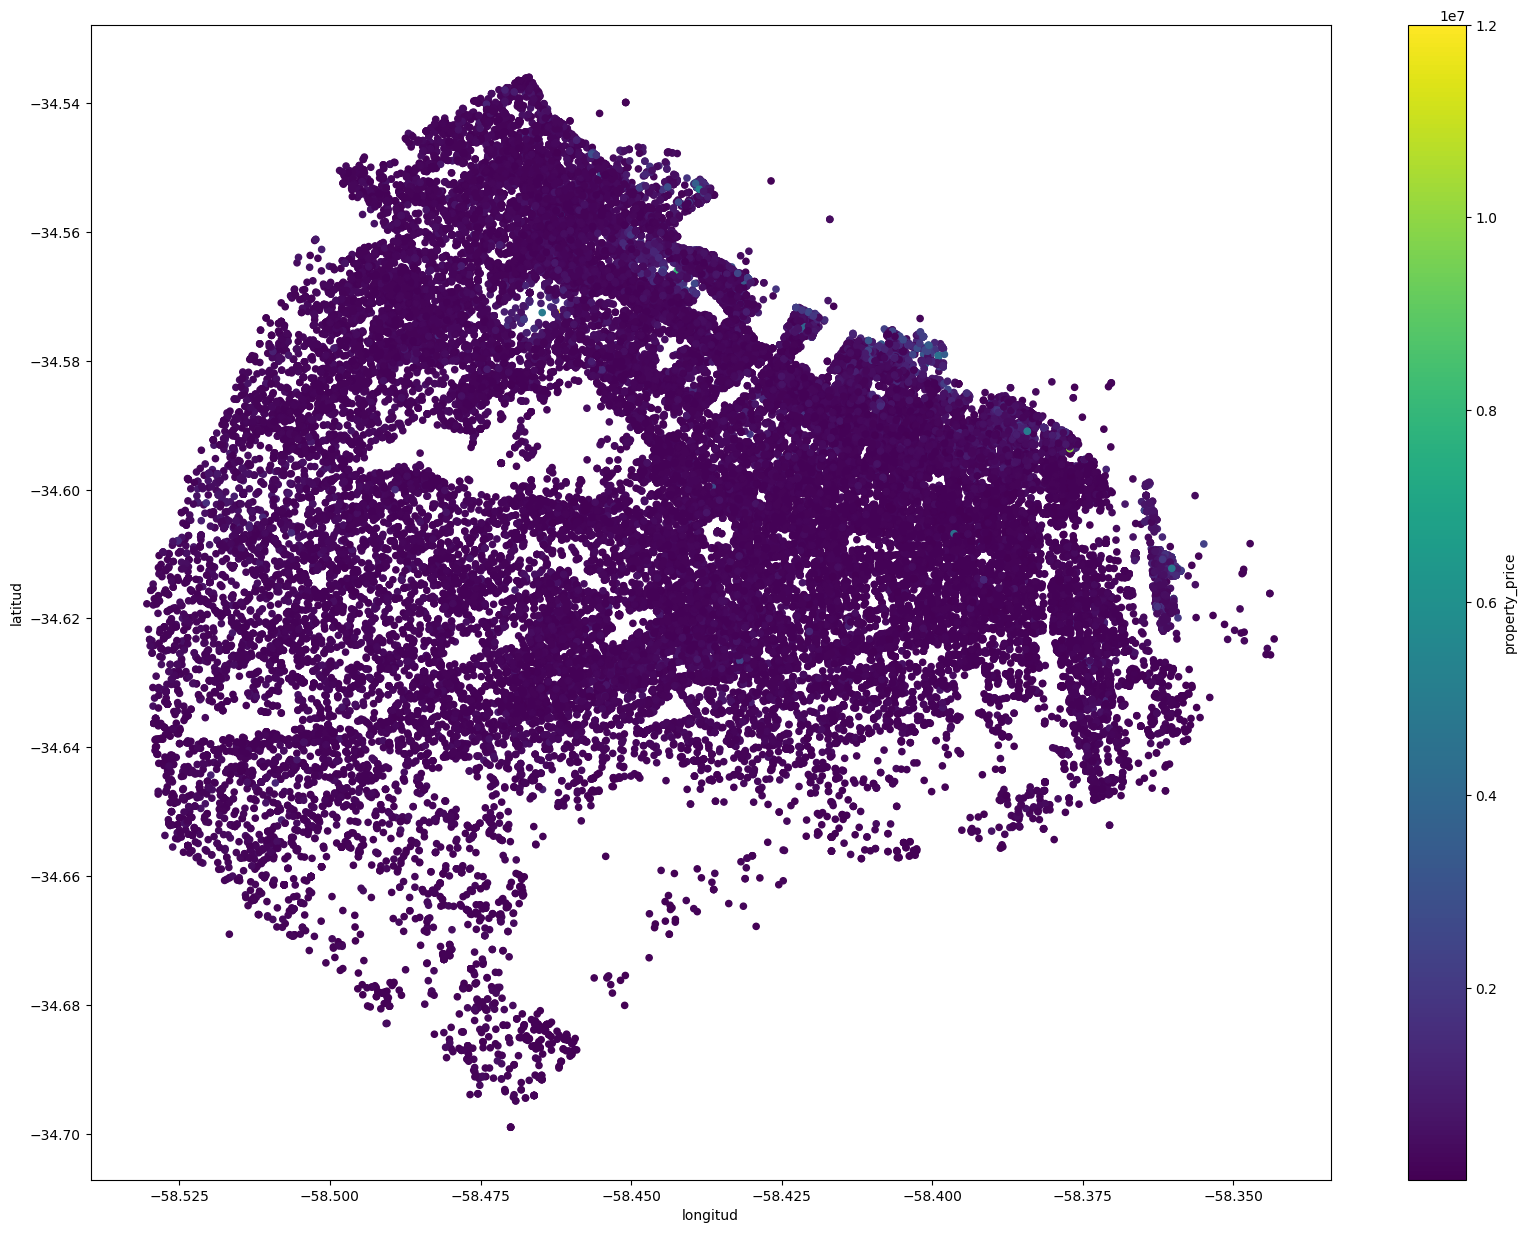

In [17]:
properati_train_set.plot(kind="scatter", x="longitud", y="latitud", c="property_price", figsize=(20,15),cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [408]:
properati_df.describe()

,index,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,93832,90272,90272,92870,82974,89059,90488,93832
mean,230894,-35,-58,3,2,108,88,226467
std,134440,0,0,1,1,961,993,319050
min,42,-35,-59,1,-1,10,1,5000
25%,114740,-35,-58,2,1,45,40,95000
50%,231023,-35,-58,3,2,65,57,144000
75%,347748,-35,-58,4,3,104,88,238000
max,460090,-35,-58,40,70,137000,217000,21400000


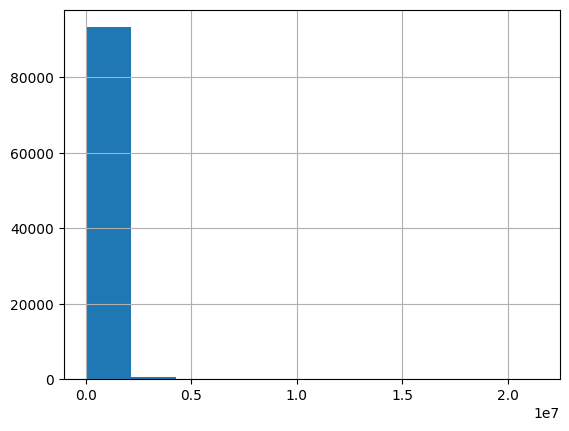

In [153]:
properati_df.property_price.hist(bins=10)
plt.show()


In [183]:
# Busco outliers 
q1 = np.quantile(properati_df.property_price, 0.25)
q3 = np.quantile(properati_df.property_price, 0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 100 * iqr
print(upper)
outliers = properati_df[properati_df.property_price > upper]
outliers.head()


14538000.0


,id,start_date,end_date,created_on,latitud,longitud,barrio,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
60073,uoM9HDKq3jZKQKgHXTIGkg==,2021-01-25,2022-05-13,2021-01-25,-35,-58,Caballito,NaN,Departamento,3,NaN,68,64,21400000,Departamento venta


### <i> Analizo las variables cualitativas </i>

In [108]:
# Analizo Frecuencias de propiedades en barrios
properati_df.barrio.value_counts()

Palermo                 14308
Belgrano                 8898
Caballito                7168
Recoleta                 6282
Villa Urquiza            4673
Almagro                  4081
Nuñez                    3546
Villa Crespo             3189
Flores                   3110
Barrio Norte             2975
Balvanera                2553
Colegiales               1951
Villa Devoto             1921
Villa del Parque         1829
Saavedra                 1829
Puerto Madero            1493
San Telmo                1380
San Cristobal            1300
San Nicolás              1295
Retiro                   1250
Barracas                 1246
Boedo                    1237
Floresta                 1195
Monserrat                1115
Parque Chacabuco         1073
Villa Pueyrredón         1011
Coghlan                   984
Villa Luro                727
Mataderos                 719
Chacarita                 697
Liniers                   668
Villa Ortuzar             662
Parque Patricios          639
Villa Luga

In [109]:
# Analizo Frecuencias de tipo de propiedad
properati_df.property_type.value_counts()

Departamento    80613
PH               9238
Casa             3981
Name: property_type, dtype: int64

### <i> Analizo estadisticas del precio agrupando variables categoricas </i>

In [117]:
properati_df.groupby('barrio')['property_price'].agg([np.mean, np.median])

,mean,median
barrio,,
Abasto,117186.350649,90000.0
Agronomía,166259.025532,149000.0
Almagro,131118.171527,114000.0
Balvanera,114697.094790,94500.0
Barracas,162932.642857,135000.0
Barrio Norte,220440.827227,160000.0
Belgrano,340443.257698,207900.0
Boca,100571.821918,79000.0
Boedo,138015.513339,110000.0


In [113]:
properati_df.groupby('property_type')['property_price'].agg([np.mean, np.median])

,mean,median
property_type,,
Casa,475009.904295,338000.0
Departamento,219921.906467,137000.0
PH,176473.396298,154900.0


#### Analisis de fechas

Quiero analizar si las fechas de los avisos tienen alguna correlación con el precio. Sospecho que no.

In [18]:
properati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93832 entries, 0 to 93831
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     93832 non-null  int64  
 1   id                        93832 non-null  object 
 2   start_date                93832 non-null  object 
 3   end_date                  93832 non-null  object 
 4   created_on                93832 non-null  object 
 5   latitud                   90272 non-null  float64
 6   longitud                  90272 non-null  float64
 7   barrio                    93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   property_type             93832 non-null  object 
 10  property_rooms            92870 non-null  float64
 11  property_bedrooms         82974 non-null  float64
 12  property_surface_total    89059 non-null  float64
 13  property_surface_covered  90488 non-null  float64
 14  proper

In [61]:
dates = properati_df[['start_date', 'created_on']].copy()
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93832 entries, 0 to 93831
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_date  93832 non-null  object
 1   created_on  93832 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


Ya que el precio no cambia durante la publicación (o por lo menos no se ve reflejado en este dataset), la columna 'end_date' no afectará el precio

In [62]:
dates.head()

,start_date,created_on
0,2021-09-09,2021-09-09
1,2021-09-09,2021-09-09
2,2021-09-09,2021-09-09
3,2021-09-09,2021-09-09
4,2021-09-09,2021-09-09


In [63]:
for column in dates.columns:
    dates[column] = pd.to_datetime(dates[column], yearfirst=True)
    
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93832 entries, 0 to 93831
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  93832 non-null  datetime64[ns]
 1   created_on  93832 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.4 MB


In [65]:
dates_differ = dates['start_date'] != dates['created_on']
dates_differ.value_counts()

False    93832
dtype: int64

Veo que 'start_date' y 'created_on' no varian. Por lo tanto una de estas es redundante. Paso esto al dataframe principal

In [66]:
properati_df.drop(columns=['end_date', 'created_on'], inplace=True)
properati_df['start_date'] = dates['start_date']
properati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93832 entries, 0 to 93831
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     93832 non-null  int64         
 1   id                        93832 non-null  object        
 2   start_date                93832 non-null  datetime64[ns]
 3   latitud                   90272 non-null  float64       
 4   longitud                  90272 non-null  float64       
 5   barrio                    93832 non-null  object        
 6   place_l4                  3643 non-null   object        
 7   property_type             93832 non-null  object        
 8   property_rooms            92870 non-null  float64       
 9   property_bedrooms         82974 non-null  float64       
 10  property_surface_total    89059 non-null  float64       
 11  property_surface_covered  90488 non-null  float64       
 12  property_price    